In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [86]:
BOP = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\Week-10-KAIM-10X\Data\BrentOilPrices.csv")
BOP.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Check the data types and missing values

In [5]:

print("\nData types and missing values:")
print(BOP.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


# Summary statistics

In [6]:

print("\nSummary statistics:")
print(BOP.describe())


Summary statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


# Plotting the price over time

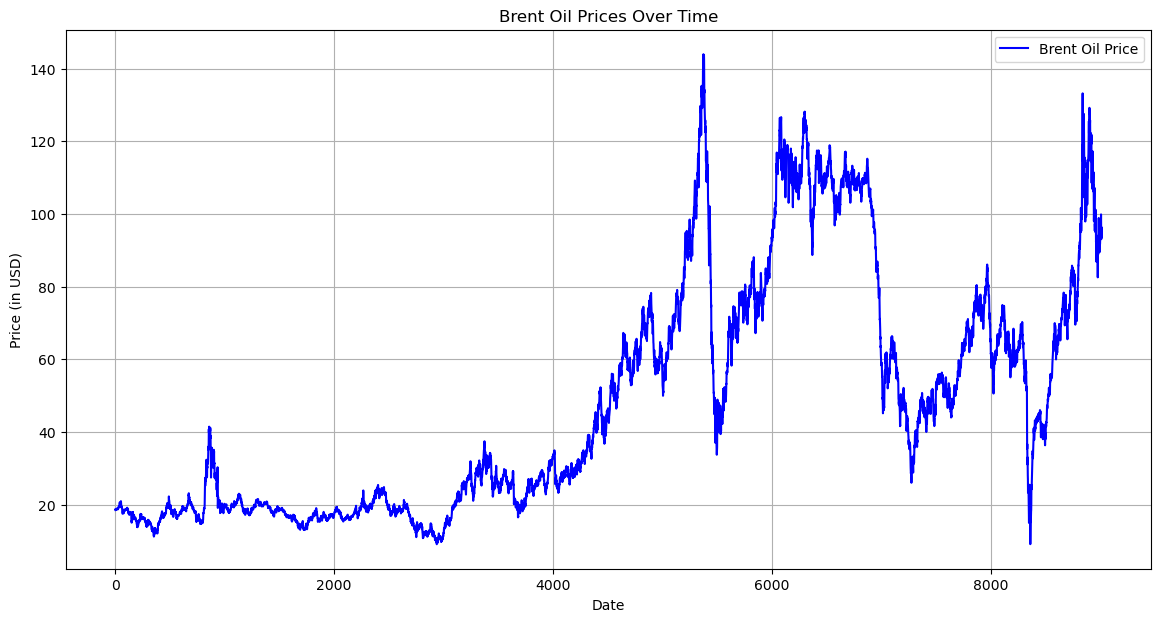

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(BOP['Price'], label='Brent Oil Price', color='b')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Date' to datetime

In [11]:
BOP['Date'] = pd.to_datetime(BOP['Date'])

# Set the date as the index

In [13]:

BOP.set_index('Date', inplace=True)

# Resampling to monthly average

In [16]:

monthly_avg = BOP['Price'].resample('M').mean()
print(monthly_avg )

Date
1987-05-31     18.580000
1987-06-30     18.860476
1987-07-31     19.856522
1987-08-31     18.979524
1987-09-30     18.313182
                 ...    
2022-07-31    111.925714
2022-08-31    100.446364
2022-09-30     89.764762
2022-10-31     93.331905
2022-11-30     95.999000
Freq: ME, Name: Price, Length: 427, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\872309792.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = BOP['Price'].resample('M').mean()


In [18]:
Yearly = BOP['Price'].resample('Y').mean()
print(Yearly )

Date
1987-12-31     18.525813
1988-12-31     14.905412
1989-12-31     18.228228
1990-12-31     23.761445
1991-12-31     20.041128
1992-12-31     19.319728
1993-12-31     17.013413
1994-12-31     15.856389
1995-12-31     17.015850
1996-12-31     20.639803
1997-12-31     19.108508
1998-12-31     12.758103
1999-12-31     17.901566
2000-12-31     28.660672
2001-12-31     24.455720
2002-12-31     24.993255
2003-12-31     28.850814
2004-12-31     38.259693
2005-12-31     54.574553
2006-12-31     65.161765
2007-12-31     72.441160
2008-12-31     96.944348
2009-12-31     61.738770
2010-12-31     79.609444
2011-12-31    111.264274
2012-12-31    111.570683
2013-12-31    108.555000
2014-12-31     98.969606
2015-12-31     52.316549
2016-12-31     43.638000
2017-12-31     54.124805
2018-12-31     71.335000
2019-12-31     64.319845
2020-12-31     42.101016
2021-12-31     70.855336
2022-12-31    103.477545
Freq: YE-DEC, Name: Price, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\748778182.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly = BOP['Price'].resample('Y').mean()


# Plotting Monthly Average Price

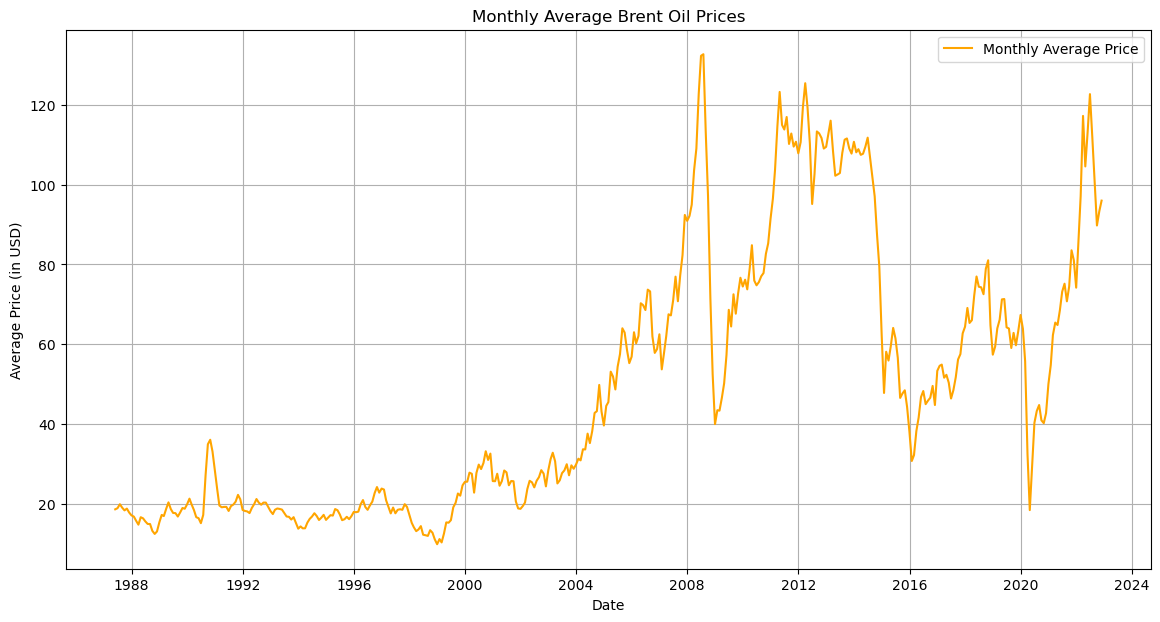

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg, label='Monthly Average Price', color='orange')
plt.title('Monthly Average Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (in USD)')
plt.legend()
plt.grid()
plt.show()

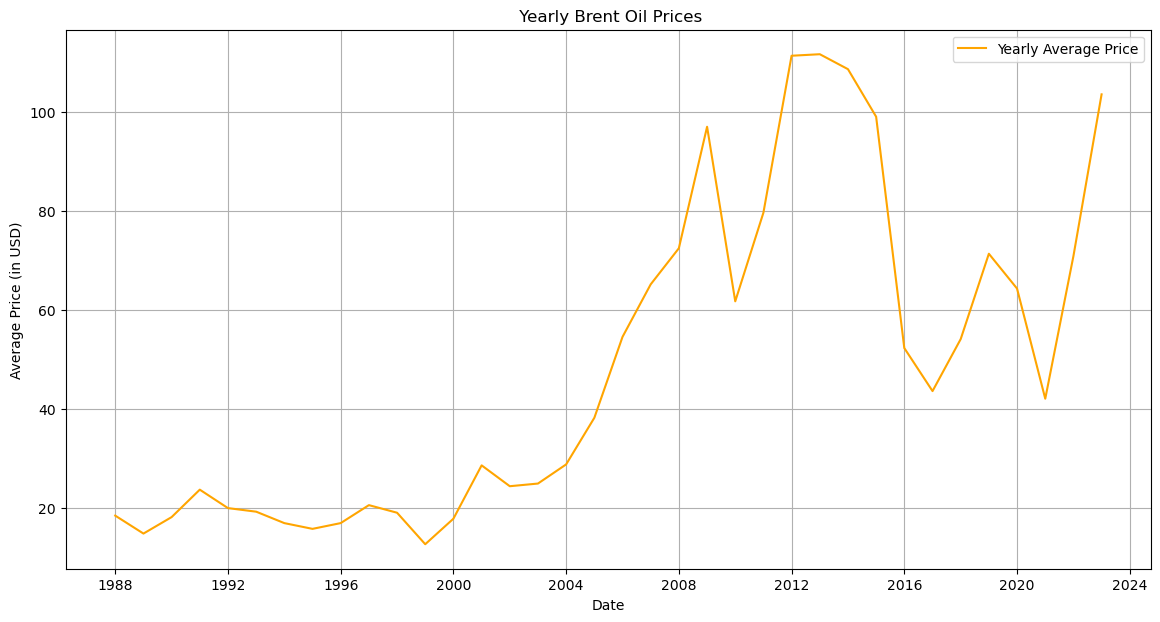

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(Yearly, label='Yearly Average Price', color='orange')
plt.title(' Yearly Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Seasonal Decomposition

<Figure size 1400x1000 with 0 Axes>

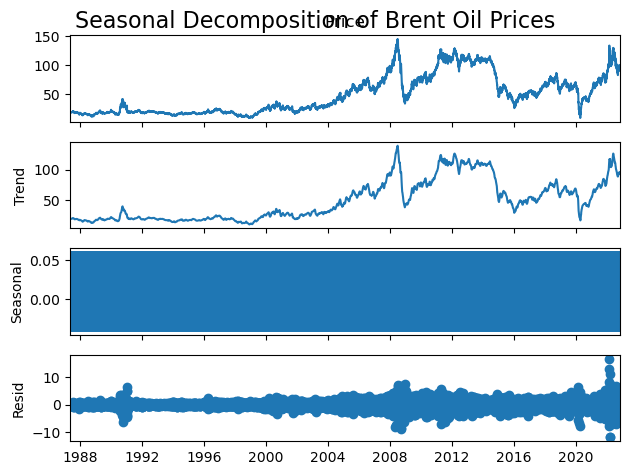

In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(BOP['Price'], model='additive', period=12)
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Brent Oil Prices', fontsize=16)
plt.show()

# Distribution of prices

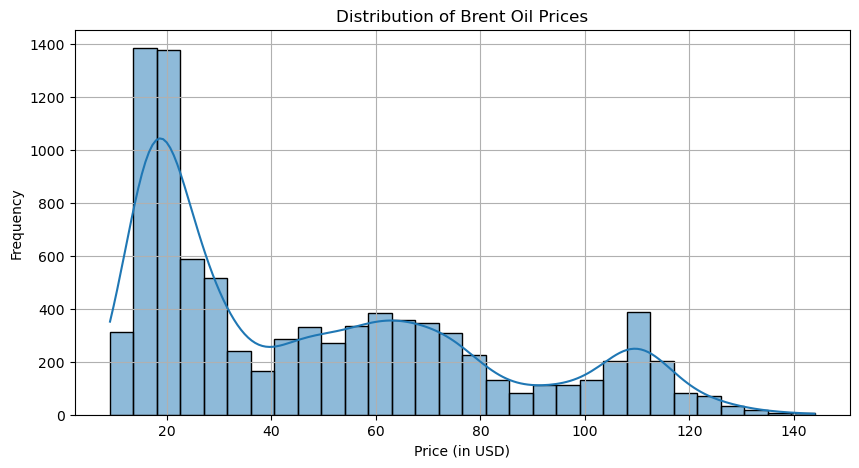

In [22]:

plt.figure(figsize=(10, 5))
sns.histplot(BOP['Price'], bins=30, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Calculate quarterly average prices

In [24]:

quarterly_avg = BOP['Price'].resample('Q').mean()
print(quarterly_avg)

Date
1987-06-30     18.783103
1987-09-30     19.063030
1987-12-31     17.865538
1988-03-31     15.655323
1988-06-30     16.129841
                 ...    
2021-12-31     79.609062
2022-03-31    100.872344
2022-06-30    113.835246
2022-09-30    100.708125
2022-12-31     94.192258
Freq: QE-DEC, Name: Price, Length: 143, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\846826057.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = BOP['Price'].resample('Q').mean()


# Plotting Price vs Quarterly Average

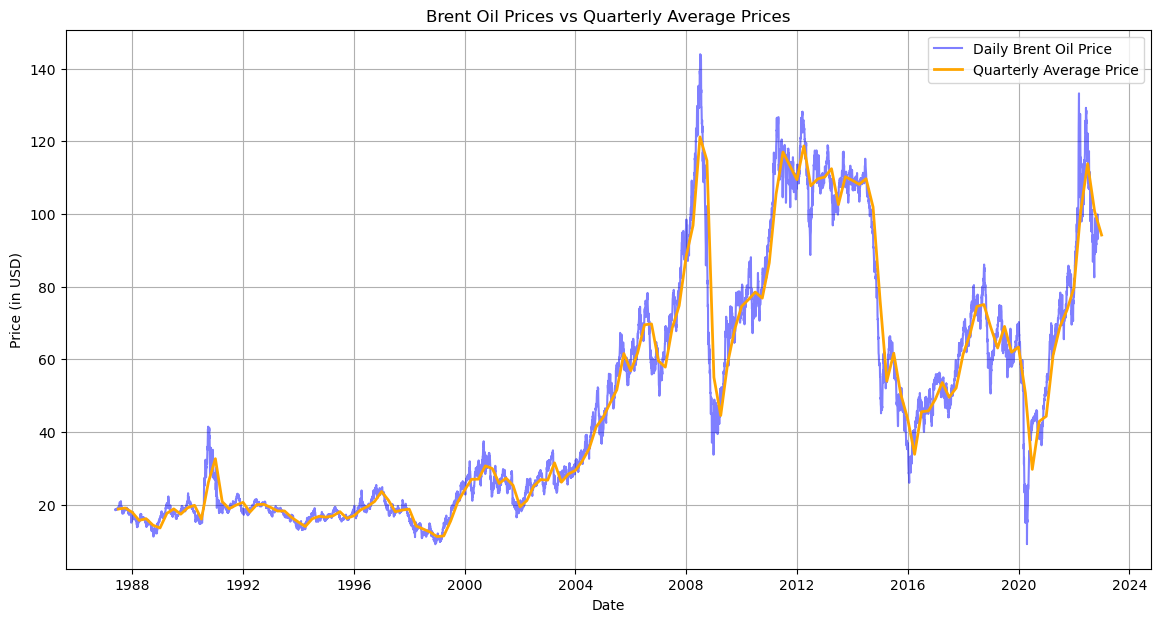

In [25]:

plt.figure(figsize=(14, 7))

# Plot the original prices
plt.plot(BOP['Price'], label='Daily Brent Oil Price', color='blue', alpha=0.5)


plt.plot(quarterly_avg, label='Quarterly Average Price', color='orange', linewidth=2)


plt.title('Brent Oil Prices vs Quarterly Average Prices')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Plotting the price over time

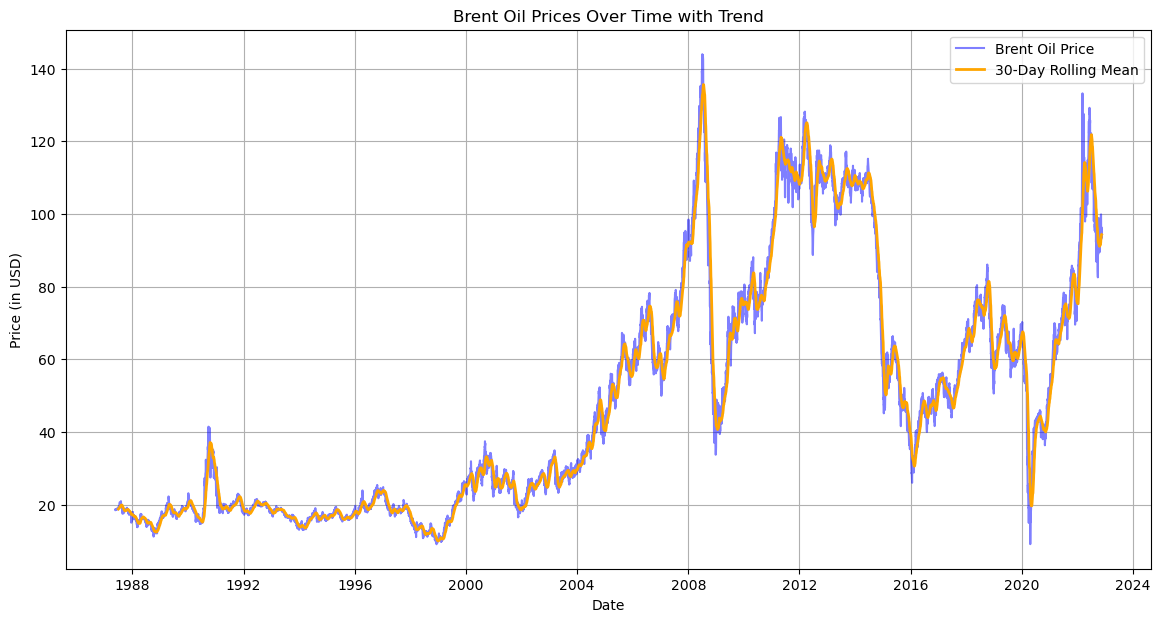

In [26]:

plt.figure(figsize=(14, 7))
plt.plot(BOP['Price'], label='Brent Oil Price', color='blue', alpha=0.5)


rolling_mean = BOP['Price'].rolling(window=30).mean() 
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange', linewidth=2)

plt.title('Brent Oil Prices Over Time with Trend')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

In [28]:
import requests
import time
from IPython.display import clear_output

In [30]:

# Function to fetch real-time oil prices
def fetch_oil_price(api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=CL=F&interval=1min&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

# Function to extract the latest price
def get_latest_price(data):
    try:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_price = float(data['Time Series (1min)'][latest_time]['1. open'])
        return latest_time, latest_price
    except KeyError:
        print("Error: Expected data not found in response.")
        print("Response:", data)
        return None, None

# Initialize parameters
api_key = 'YOUR_API_KEY'  # Replace with your Alpha Vantage API key
prices = []
times = []

# Set up the plot
plt.ion()  # Turn on interactive mode
plt.figure(figsize=(14, 7))

# Real-time monitoring loop
try:
    for _ in range(10):  # Fetch data 10 times for demonstration; adjust as needed
        # Fetch the oil price
        data = fetch_oil_price(api_key)

        # Get the latest price
        latest_time, latest_price = get_latest_price(data)
        
        if latest_time is None or latest_price is None:
            time.sleep(60)  # Wait before the next fetch
            continue
        
        # Append the data
        times.append(latest_time)
        prices.append(latest_price)

        # Clear the output for the updated plot
        clear_output(wait=True)

        # Plot the data
        plt.clf()
        plt.plot(times, prices, label='Brent Oil Price', color='blue')
        plt.title('Real-Time Brent Oil Prices')
        plt.xlabel('Time')
        plt.ylabel('Price (in USD)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()

        # Draw the updated plot
        plt.pause(60)  # Pause for 60 seconds before fetching again

except KeyboardInterrupt:
    print("Real-time monitoring stopped.")
    

Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Error: Expected data not found in response.
Response: {}
Real-time monitoring stopped.


<Figure size 1400x700 with 0 Axes>

In [31]:
pip install ruptures matplotlib pandas

In [32]:

import ruptures as rpt

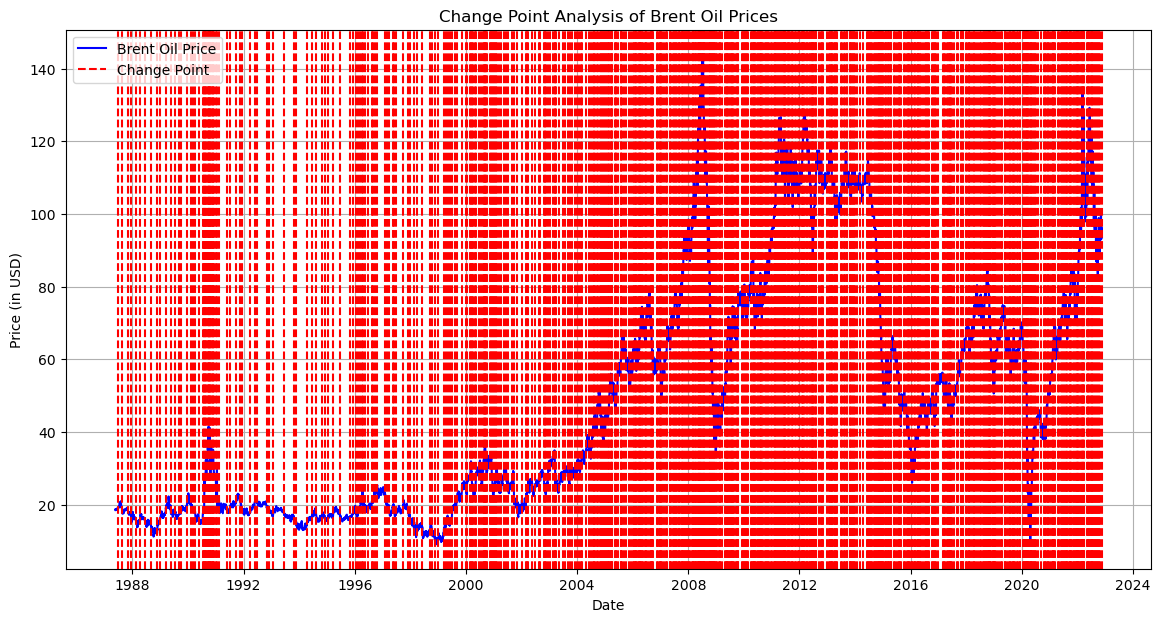

Detected change points (indices): [30, 60, 120, 145, 190, 225, 270, 330, 390, 415, 465, 510, 555, 585, 605, 660, 695, 715, 735, 770, 805, 815, 820, 830, 835, 840, 850, 855, 860, 865, 870, 875, 880, 890, 900, 905, 910, 925, 935, 955, 1030, 1060, 1115, 1155, 1165, 1245, 1285, 1310, 1395, 1420, 1455, 1550, 1645, 1665, 1760, 1805, 1845, 1895, 1925, 1950, 2000, 2060, 2155, 2185, 2205, 2230, 2250, 2265, 2270, 2290, 2320, 2350, 2365, 2385, 2405, 2475, 2485, 2510, 2540, 2555, 2570, 2630, 2675, 2695, 2730, 2755, 2805, 2875, 2895, 2920, 2950, 3000, 3020, 3040, 3055, 3075, 3100, 3120, 3165, 3200, 3210, 3240, 3250, 3255, 3265, 3280, 3290, 3320, 3335, 3355, 3365, 3370, 3375, 3385, 3395, 3420, 3435, 3440, 3445, 3455, 3465, 3475, 3485, 3505, 3525, 3545, 3570, 3585, 3620, 3640, 3670, 3710, 3750, 3760, 3770, 3810, 3830, 3870, 3885, 3915, 3925, 3940, 3955, 3975, 3995, 4015, 4020, 4030, 4060, 4090, 4115, 4140, 4160, 4175, 4205, 4225, 4240, 4255, 4265, 4310, 4335, 4355, 4370, 4380, 4390, 4410, 4420, 4440,

In [35]:



# Extract the price series
price_series = BOP['Price'].values

# Change point detection using Pelt method
model = "l2"  # Model type: "l2" for changes in mean
algo = rpt.Pelt(model=model).fit(price_series)
change_points = algo.predict(pen=10)  # Adjust penalty as needed

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(BOP.index, price_series, label='Brent Oil Price', color='blue')
for cp in change_points:
    plt.axvline(x=BOP.index[cp - 1], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.title('Change Point Analysis of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Print the detected change points
print("Detected change points (indices):", change_points)

In [36]:
pip install requests pandas matplotlib ipywidgets

# Simple Dashboard

In [37]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [38]:

# Function to fetch real-time oil prices
def fetch_oil_price(api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=CL=F&interval=1min&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

# Function to extract the latest price
def get_latest_price(data):
    try:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_price = float(data['Time Series (1min)'][latest_time]['1. open'])
        return latest_time, latest_price
    except KeyError:
        print("Error: Expected data not found in response.")
        return None, None

# Function to update the plot
def update_plot(api_key):
    prices = []
    times = []
    
    with output:
        clear_output(wait=True)  # Clear previous output
        plt.ion()
        plt.figure(figsize=(14, 7))
        
        for _ in range(10):  # Fetch data 10 times for demonstration
            data = fetch_oil_price(api_key)
            latest_time, latest_price = get_latest_price(data)
            
            if latest_time is None or latest_price is None:
                print("Fetching error, retrying...")
                continue
            
            times.append(latest_time)
            prices.append(latest_price)

            plt.clf()
            plt.plot(times, prices, label='Brent Oil Price', color='blue')
            plt.title('Real-Time Brent Oil Prices')
            plt.xlabel('Time')
            plt.ylabel('Price (in USD)')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid()
            plt.pause(1)  # Pause for 1 second before fetching again

# Set up the dashboard
api_key = 'YOUR_API_KEY'  # Replace with your Alpha Vantage API key
start_button = widgets.Button(description="Start Monitoring")
output = widgets.Output()

# Define button click event
def on_start_button_clicked(b):
    update_plot(api_key)

start_button.on_click(on_start_button_clicked)

# Display the dashboard
display(start_button, output)

Button(description='Start Monitoring', style=ButtonStyle())

Output()

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [41]:
pip install pandas numpy matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Generate synthetic time series data

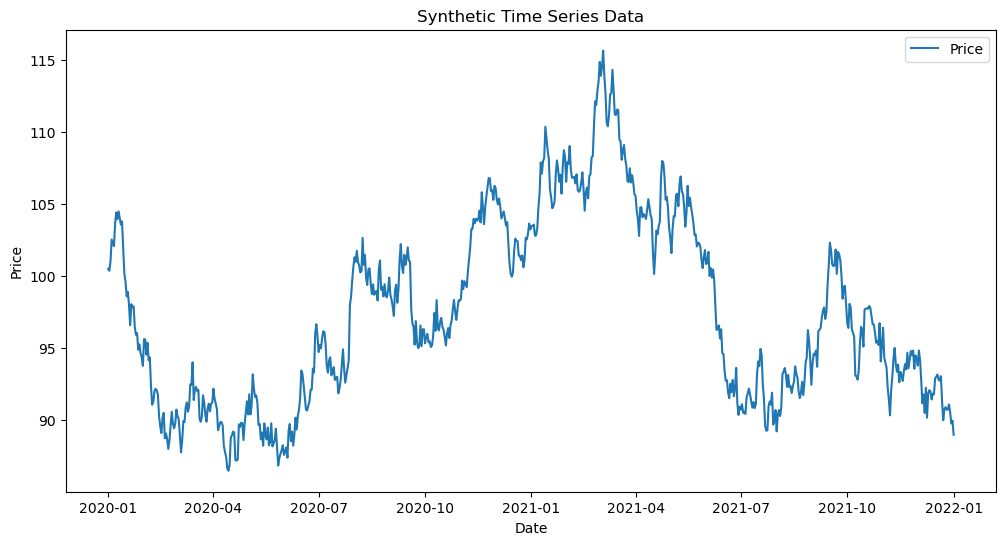

In [45]:

np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-01-01', freq='D')
data = np.random.randn(len(date_rng)).cumsum() + 100  # Cumulative sum to simulate trend
BOP = pd.DataFrame(data, index=date_rng, columns=['Price'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(BOP, label='Price')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Check for stationarity using the Augmented Dickey-Fuller test

In [ ]:


result = adfuller(BOP['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.8870734444212423
p-value: 0.3381663912528341


# Differencing to make the series stationary

In [47]:


BOP['Price_diff'] = BOP['Price'].diff().dropna()



# Fit the ARIMA model 

In [48]:

model = ARIMA(BOP['Price'], order=(1, 1, 1))  # Example order (p=1, d=1, q=1)
model_fit = model.fit()



# Summary of the model

In [49]:

print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  732
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1024.430
Date:                Fri, 21 Feb 2025   AIC                           2054.860
Time:                        22:41:12   BIC                           2068.643
Sample:                    01-01-2020   HQIC                          2060.177
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7444      0.423      1.760      0.078      -0.085       1.573
ma.L1         -0.7690      0.405     -1.898      0.058      -1.563       0.025
sigma2         0.9655      0.049     19.890      0.0

# Forecasting

In [ ]:

forecast = model_fit.forecast(steps= 365)  # Forecast next 365 days
print(forecast)



2022-01-02    89.010908
2022-01-03    89.039309
2022-01-04    89.060449
2022-01-05    89.076186
2022-01-06    89.087900
                ...    
2022-12-28    89.122012
2022-12-29    89.122012
2022-12-30    89.122012
2022-12-31    89.122012
2023-01-01    89.122012
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


# Plot the results

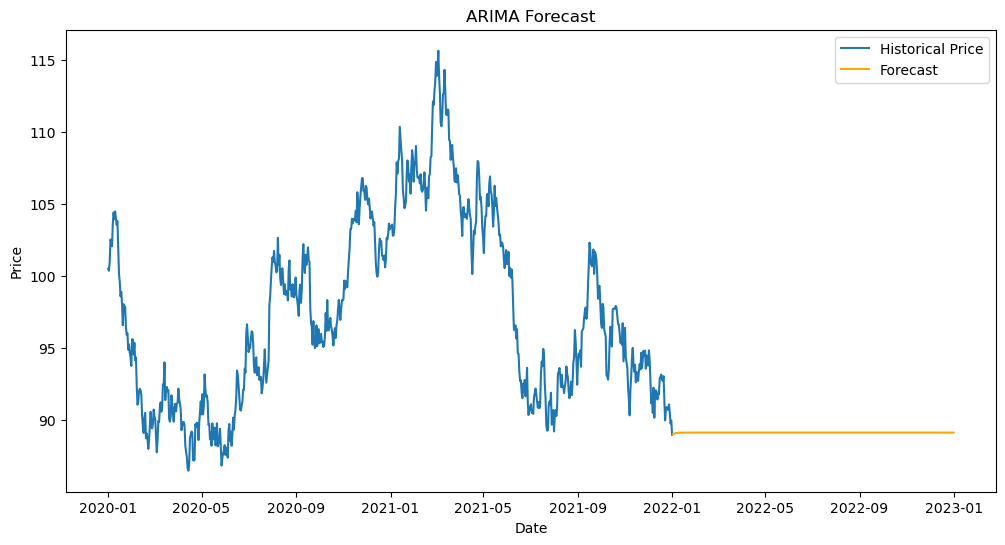

In [56]:

plt.figure(figsize=(12, 6))
plt.plot(BOP['Price'], label='Historical Price')
plt.plot(pd.date_range(start=BOP.index[-1] + pd.Timedelta(days=1), periods=365, freq='D'), forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
pip install pandas numpy matplotlib arch


   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   --

In [58]:
import matplotlib.pyplot as plt
from arch import arch_model

# Generate synthetic return data (replace this with your dataset)

In [59]:

np.random.seed(42)
n = 1000
returns = np.random.normal(0, 1, n)  # Simulated returns
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
BOP = pd.DataFrame(returns, index=dates, columns=['Returns'])

# Plot the synthetic returns

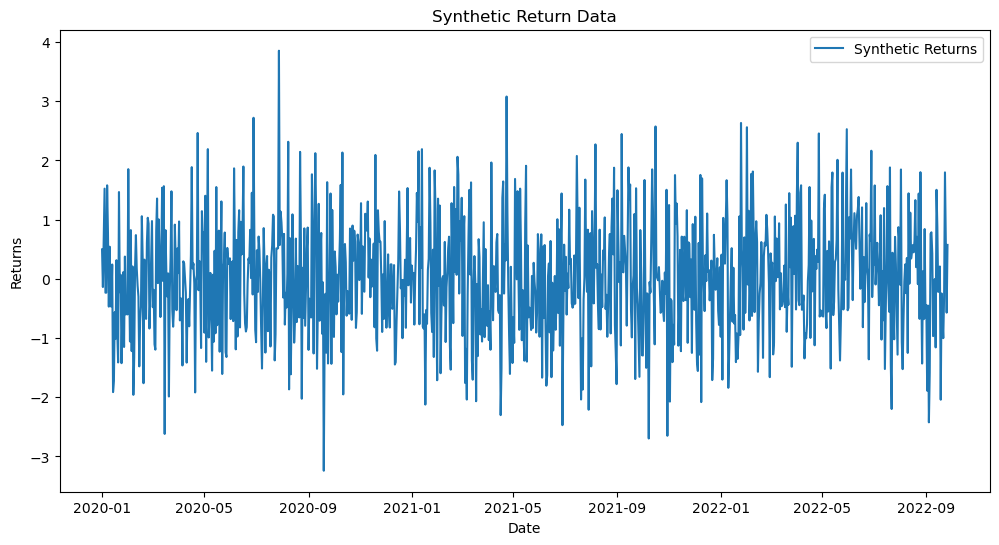

In [60]:

plt.figure(figsize=(12, 6))
plt.plot(BOP['Returns'], label='Synthetic Returns')
plt.title('Synthetic Return Data')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Fit a GARCH model 

In [61]:

model = arch_model(BOP['Returns'], vol='Garch', p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4488.113750684418
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1441.6529166357054
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1397.4377304357033
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1397.4267953214355
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1511.515702739896
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1510.753602997038
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1503.7182495381144
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1403.3426619942009
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1401.024050372981
Iteration:     10,   Func. Count:     62,   Neg. LLF: 34727.42076675143
Iteration:     11,   Func. Count:     71,   Neg. LLF: 43695.92747228674
Iteration:     12,   Func. Count:     82,   Neg. LLF: 47524.82750367433
Iteration:     13,   Func. Count:     93,   Neg. LLF: 619694348.6773473
Iteration:     14,   Func. Count:    101,   Neg. LLF: 1397.

# Print the model summary

In [62]:

print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1397.17
Distribution:                  Normal   AIC:                           2802.33
Method:            Maximum Likelihood   BIC:                           2821.96
                                        No. Observations:                 1000
Date:                Fri, Feb 21 2025   Df Residuals:                      999
Time:                        22:54:20   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0181  3.107e-02      0.582      0.560 

# Forecasting the next 10 days of volatility

In [87]:

forecast = model_fit.forecast(horizon=365)
print(forecast)

# Plot the forecasted volatility

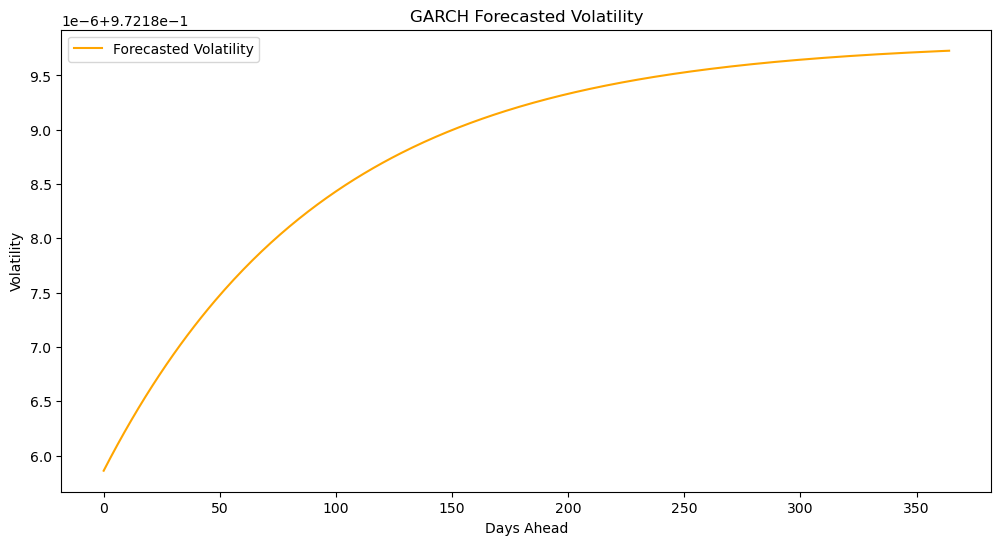

In [88]:

plt.figure(figsize=(12, 6))
plt.plot(forecast.variance.values[-1], label='Forecasted Volatility', color='orange')
plt.title('GARCH Forecasted Volatility')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [67]:
pip install pandas matplotlib yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     

In [69]:
import yfinance as yf

# Define the ticker symbol for Brent Crude Oil

In [70]:

ticker = 'BZ=F'  # Brent Crude Oil Futures

# Fetch historical data from Yahoo Finance

In [71]:

start_date = '2004-01-01'
end_date = '2022-12-31'

# Download the data and # View the dataset

In [72]:

oil_data = yf.download(ticker, start=start_date, end=end_date)

# View the first few rows of the dataset
print(oil_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open Volume
Ticker           BZ=F       BZ=F       BZ=F       BZ=F   BZ=F
Date                                                         
2007-07-30  75.739998  76.529999  75.440002  75.849998   2575
2007-07-31  77.050003  77.169998  75.669998  75.699997   3513
2007-08-01  75.349998  77.059998  74.860001  77.000000   3930
2007-08-02  75.760002  76.209999  74.269997  75.220001   6180
2007-08-03  74.750000  76.000000  74.529999  75.389999   4387


# Plotting the historical oil prices

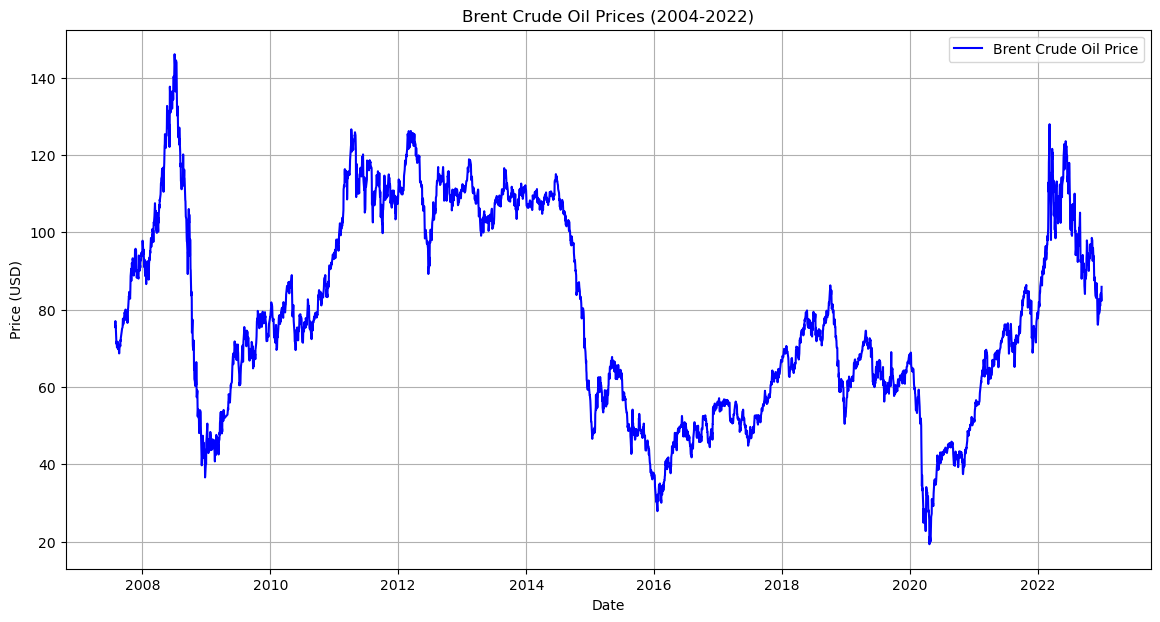

In [75]:

plt.figure(figsize=(14, 7))
plt.plot(oil_data['Close'], label='Brent Crude Oil Price', color='blue')
plt.title('Brent Crude Oil Prices (2004-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Import Libraries for pricdiction model 

In [76]:
import pandas as pd
from flask import Flask, request, jsonify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import json

In [89]:
BOP = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\Week-10-KAIM-10X\Data\BrentOilPrices.csv")
BOP.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [90]:
BOP['Date'] = BOP['Date'].map(pd.Timestamp.toordinal)

AttributeError: 'str' object has no attribute 'year'

In [91]:
BOP.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [93]:
BOP['Date'] = pd.to_datetime(BOP['Date'], errors='coerce')

C:\Users\pc\AppData\Local\Temp\ipykernel_24180\3253821064.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  BOP['Date'] = pd.to_datetime(BOP['Date'], errors='coerce')


In [94]:
BOP['Date'] = BOP['Date'].map(pd.Timestamp.toordinal)